[원문](https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571)

# Stock Price Prediction using Machine Learning
주식 데이터를 시계열로 처리하면 과거의 주가(및 기타 변수)를 사용하여 다음 날 또는 다음 주에 대한 주가를 예측할 수 있습니다. RNN(Recurrent Neural Networks) 또는 LSTM과 같은 기계 학습 모델은 날씨 예측, 선거 결과, 집값 및 물론 주가 등의 시계열 데이터를 예측하는 데 적용되는 인기 있는 모델입니다. 이 아이디어는 최근 및 이전 데이터의 중요성을 따져보고 어떤 매개변수가 "현재" 또는 "다음" 일 가격에 가장 큰 영향을 미치는지 결정하는 것입니다. 머신러닝 모델은 각 시장 특징에 가중치를 부여하고 모델이 미래 주가를 예측하기 위해 살펴봐야 할 히스토리를 결정합니다.

# Stock Price Prediction using Moving Average Time Series 
먼저 이동 평균(MA)을 사용하여 고려된 기록의 양(또는 과거 데이터 점의 수)이 모델의 성능에 어떤 영향을 미치는지 이해할 수 있습니다. 단순 이동 평균은 과거 N개의 데이터 점의 평균을 계산하고 이 값을 예측 N+1 값으로 취합니다.

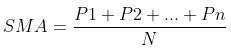

이동평균시계열의 주가예측정에 관한 연구

여기서 P1 ~ Pn은 현재 데이터 포인트를 예측하기 위해 n 크기의 SMA를 취한다. SMA가 우리의 예측할 값 입니다. 모형의 정밀도는 n의 선택에 따라 크게 달라집니다. n이 높을수록 현재 가치를 계산하기 위해 과거로 더 깊이 들어갈 용의가 있다는 것을 의미합니다. 예를 들어, n=2는 지난 이틀 동안의 주가 평균을 취한다는 의미이고, n=50은 50일 분량의 주가를 고려한다는 의미입니다. 분명히 50일치 데이터는 주식의 동향에 대한 더 많은 정보를 담고 있고 더 나은 예측으로 이어질 것입니다. 그러나 상황에 따라 n이 클수록 세분화된 변동이 완화되므로 모델을 불안정하게 만들 수도 있습니다.

또 다른 이동 평균은 지수 이동 평균(EMA)으로, 더 최근의 표본에 더 많은 가중치를 부여한다. 이를 통해 과거의 더 많은 데이터 지점을 살펴볼 수 있지만 여전히 최근의 변동 추세는 줄어들지 않습니다.

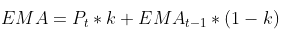

여기서 Pt는 t 시점의 가격이고 k는 해당 데이터 점에 주어진 가중치입니다. EMA(t-1)는 과거 t-1 포인트에서 계산된 값을 나타냅니다. 분명히, 이것은 단순한 MA보다 더 나은 성능을 발휘할 것입니다. 무게 k는 k = 2/(N+1)로 계산됩니다.

이러한 방법을 구현하는 동안, 우리는 EMA가 SMA보다 어떻게 더 나은 성능을 발휘하는지 볼 것이며, 더 최근의 데이터 포인트에 더 높은 가중치를 할당하면 더 많은 성과를 낼 수 있다는 것을 증명할 것이다. 그러나 지금은 시계열 데이터로 주가의 경우를 가정해 보자.

따라서 더 많은 과거 데이터와 더 새로운 샘플에 더 많은 중요성을 부여하기 때문에, EMA는 SMA보다 더 잘 수행된다. 그러나 매개 변수의 정적 특성을 고려할 때 EMA는 모든 경우에 대해 잘 수행되지 않을 수 있다. EMA에서 우리는 k의 값(과거 데이터의 가중치/중요도)을 고정했고, 그것은 창 크기 N(과거 고려하고자 하는 과거 크기)과 연결되어 있다.

이러한 매개 변수를 수동으로 설정하기가 어렵고 최적화가 불가능할 수 있습니다. 따라서, 우리는 각 과거 데이터 점의 중요성을 계산하고 예측을 최적화할 수 있는 더 복잡한 모델을 사용할 수 있다. 이것은 기계 학습 모델을 훈련하는 동안 체중 업데이트를 통해 달성될 수 있다. 그리고 미래를 계산하기 위해 과거의 데이터를 사용하는 것을 생각할 때, 가장 즉시 떠오르는 모델은 LSTM 모델입니다!

# 주가 예측을 위한 Long Short Term Memory Network 이해
LSTM은 데이터 시퀀스에서 작동하는 순환 신경망으로, 시간 창에서 관련 정보만 유지하는 방법을 학습한다. 네트워크가 학습하는 새로운 정보는 모델에 대한 새로운 샘플의 중요도에 따라 각 시간 단계에 따라 업데이트되는 "메모리"에 추가된다. 수년에 걸쳐 LSTM은 음성 및 필기 인식, 언어 이해, 예측 및 오늘날 새로운 표준이 된 여러 다른 응용 프로그램을 혁신했습니다. 

표준 LSTM 셀은 입력, 출력 및 망각 게이트의 세 가지 게이트로 구성됩니다. 이러한 게이트는 가중치를 학습하고 현재 데이터 샘플 중 얼마를 기억해야 하는지, 그리고 과거에 학습한 콘텐츠 중 얼마를 잊어야 하는지를 결정한다. 이 간단한 구조는 이전 및 유사한 RNN 모델에 비해 개선된 것이다.

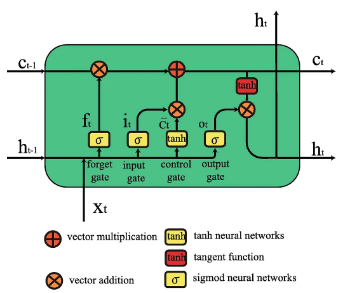

아래 방정식에서 볼 수 있듯이, i, f, o는 input, forget, and output의 세 개의 게이트를 나타냅니다. C는 학습된 데이터를 보존하는 셀 상태로 출력 h로 주어진다. 이 모든 것은 타임스탬프(t-1)에서 학습된 데이터를 고려하여 각 타임스탬프 t일 때 계산된다.

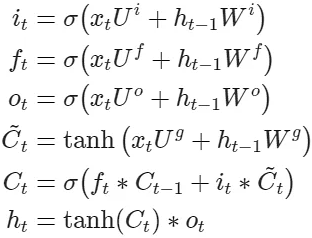

forget 게이트는 현재 셀 상태에서 지울 수 있는 정보와 양을 결정하는 반면, input 게이트는 현재 셀 상태에 추가할 정보를 결정합니다. 최종 방정식에 사용되는 output 게이트는 처음 두 게이트에 의해 계산된 출력의 크기를 제어합니다.

따라서 standard feed-forward neural nets과 달리 LSTM은 과거 데이터 창의 일부를 능동적으로 기억하거나 지울 수 있는 잠재력을 가지고 있다. 데이터를 보면서 읽고 훈련하는 그것의 특징은 그것의 훈련을 독특하게 만든다. 

# Evaluating Prediction Performance for Stock Price Prediction
알고리즘을 실행하기 전에 모델의 성능을 측정하기 위한 메트릭을 명확히 합시다. 주가 예측은 근본적인 회귀 문제이며, 우리는 RMSE(Root Mean Square Error) 또는 MAPE(Mean Absolute Percentage Error)를 사용하여 우리의 가격 예측이 실제 세계와 얼마나 가깝거나 멀리 떨어져 있는지를 측정할 수 있습니다.

RMSE의 공식을 자세히 살펴보면, 우리는 모든 N개의 타임스탬프에 대한 실제(At)와 예측(Ft) 가격 값 사이의 차이(또는 오차)를 어떻게 고려할 수 있는지 알 수 있고 절대적인 오차 측정값을 얻을 수 있습니다.

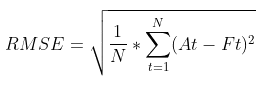

반면, MAPE는 실제 차이를 고려하는 대신 예측 값이 실제 값과 얼마나 떨어져 있는지를 상대적으로 측정합니다. 이것은 너무 크거나 작은 값을 처리할 경우 오류 범위를 확인하는 좋은 방법입니다. 예를 들어, 10e6 값에 대한 RMSE는 과장될 수도 있지만, MAPE는 고정된 범위의 오류를 유지할 것이다.

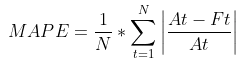

# Stock Price Prediction Project using Machine Learning in Python with Source Code

먼저, 우리는 파이썬에서 케라스를 사용하여 간단한 LSTM 네트워크를 구현할 것이다. 데이터 세트를 살펴보겠습니다. 우리는 finance.yahoo.com에서 데이터를 다운로드하는 것만으로 실제 주식 데이터를 작업할 수 있습니다.

[TQQQ](https://finance.yahoo.com/quote/TQQQ/history?p=TQQQ) csv 파일 다운로드 해주세요

In [10]:
import pandas as pd
TQQQ = pd.read_csv('TQQQ.csv', index_col='Date')
TQQQ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-02,15.8000,15.8575,15.1500,15.4300,15.424422,123460000
2019-08-05,14.4850,14.4850,13.4200,13.8100,13.805008,151242400
2019-08-06,14.1800,14.4950,13.8750,14.3775,14.372302,106770400
2019-08-07,13.9025,14.6575,13.5750,14.5875,14.582226,153954400
2019-08-08,14.8100,15.5575,14.6725,15.5525,15.546878,109528000


## 데이터 분석하기

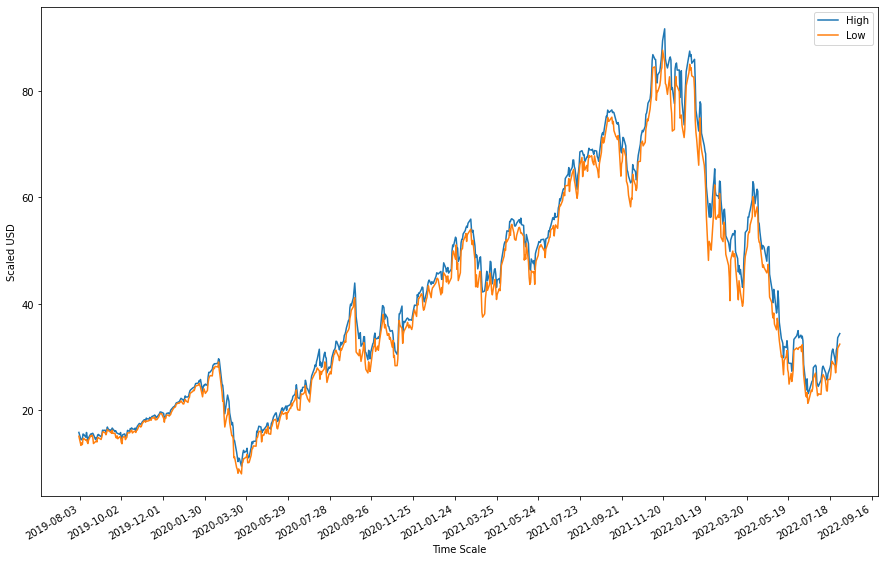

In [11]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in TQQQ.index.values]

plt.plot(x_dates, TQQQ['High'], label='High')
plt.plot(x_dates, TQQQ['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

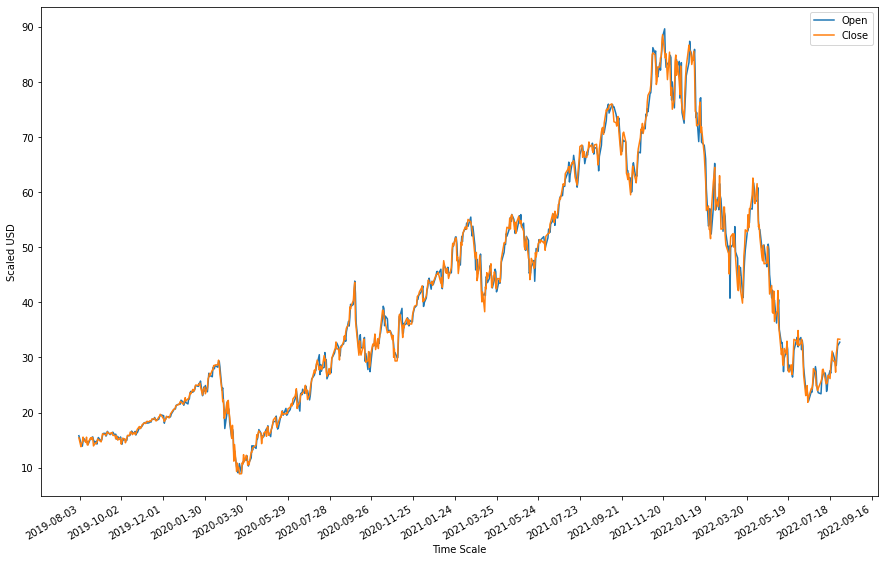

In [12]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in TQQQ.index.values]

plt.plot(x_dates, TQQQ['Open'], label='Open')
plt.plot(x_dates, TQQQ['Close'], label='Close')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

2020년 3월과 2022년 2월에 보여지는 것처럼 급격한 변화를 추정하는 것은 어려울 것입니다. 데이터 범위를 2020년 4월 이후부터로 가공할 수 있지만 우선 전체 데이터를 사용해서 과거 데이터로 현재 값을 예측하는 것에만 집중하겠습니다. (힌트일지도...)

## Library import 하기

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit

## Data 가공하기

In [14]:
target_y = TQQQ['Close']
X_feat = TQQQ.iloc[:, 0:3]

- X_feat 값들을 -1과 1 사이로 스케일링 합니다.

In [17]:
#Feature Scaling
sc = StandardScaler()
X_ft = sc.fit_transform(X_feat.values)
X_ft = pd.DataFrame(columns=X_feat.columns,
                    data=X_ft,
                    index=X_feat.index)

## scaler 저장하기

In [176]:
from pickle import dump

dump(sc, open('./standard_scaler.pkl', 'wb'))

## Train set과 Test set 나누기

LSTM 모델의 훈련은 각 훈련 단계에서 데이터의 window 또는 time step를 필요로 한다. 예를 들어, LSTM은 첫 9개의 입력 샘플을 한 단계로 측정하여 10번째 샘플을 예측하기 위해 10개의 데이터 샘플을 추출합니다. 따라서 sickit-learn에서 제공하는 train_test_split과는 다른 접근 방식이 필요합니다.

데이터의 첫 번째 샘플에서 시작하여 마지막부터 n_steps 샘플로 끝나는 크기 "n_step"의 window을 만드는 split 함수를 정의합니다. 우리는 각 시간 단계에 대해 LSTM이 훈련을 위해 n_step-1 샘플을 추출하고 마지막 샘플을 예측한다는 것을 알고 있습니다. 손실 계산은 이 예측의 오차를 기반으로 수행됩니다. 따라서 n_steps=10이면 현재 단계의 "10번째" 데이터 점이 데이터 집합에 존재하지 않기 때문에 마지막 9개의 표본을 사용하여 어떤 것도 예측할 수 없습니다.

아래 함수는 전체 데이터를 가져와서 처음부터 n_step 크기의 window을 만듭니다. target y는 n_steps의 인덱스에 해당하는 목표값을 포함할 것이다. 따라서 n_step이 10이면 X의 첫 번째 요소는 10개의 데이터 샘플의 특징을 가지며 y는 10번째 데이터 샘플의 대상을 포함합니다.

In [18]:
def lstm_split(data, n_steps):
  X, y = [], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i + n_steps, :-1])
    y.append(data[i + n_steps-1, -1])
  return np.array(X), np.array(y)

In [32]:
X_ft.shape

(755, 3)

In [33]:
target_y.shape

(755,)

In [43]:
stock_data_ft = pd.concat([X_ft, target_y], axis=1)

In [112]:
X1, y1 = lstm_split(stock_data_ft.values, n_steps=1)

train_split = 0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = stock_data_ft.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
y_train, y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(755, 1, 3) (604, 1, 3) (151, 1, 3) (604,) (151,)


## Building the LSTM model

In [122]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(Dense(1))
lstm.compile(loss='mean_absolute_percentage_error', optimizer='adam')
lstm.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 1, 32)             4608      
                                                                 
 dense_14 (Dense)            (None, 1, 1)              33        
                                                                 
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [123]:
history = lstm.fit(X_train, y_train,
                   epochs=50, batch_size=4,
                   verbose=2, shuffle=False)

Epoch 1/50
151/151 - 1s - loss: 99.2386 - 1s/epoch - 9ms/step
Epoch 2/50
151/151 - 0s - loss: 95.9556 - 244ms/epoch - 2ms/step
Epoch 3/50
151/151 - 0s - loss: 87.0493 - 260ms/epoch - 2ms/step
Epoch 4/50
151/151 - 0s - loss: 72.1180 - 269ms/epoch - 2ms/step
Epoch 5/50
151/151 - 0s - loss: 58.6799 - 250ms/epoch - 2ms/step
Epoch 6/50
151/151 - 0s - loss: 51.4478 - 253ms/epoch - 2ms/step
Epoch 7/50
151/151 - 0s - loss: 44.1430 - 235ms/epoch - 2ms/step
Epoch 8/50
151/151 - 0s - loss: 39.2486 - 273ms/epoch - 2ms/step
Epoch 9/50
151/151 - 0s - loss: 37.2100 - 245ms/epoch - 2ms/step
Epoch 10/50
151/151 - 0s - loss: 35.8841 - 241ms/epoch - 2ms/step
Epoch 11/50
151/151 - 0s - loss: 34.6503 - 239ms/epoch - 2ms/step
Epoch 12/50
151/151 - 0s - loss: 33.3983 - 249ms/epoch - 2ms/step
Epoch 13/50
151/151 - 0s - loss: 32.0912 - 246ms/epoch - 2ms/step
Epoch 14/50
151/151 - 0s - loss: 30.6538 - 232ms/epoch - 2ms/step
Epoch 15/50
151/151 - 0s - loss: 29.0870 - 235ms/epoch - 2ms/step
Epoch 16/50
151/151 - 

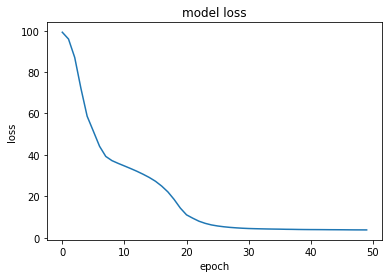

In [124]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [125]:
y_pred = lstm.predict(X_test).squeeze()

In [126]:
rmse= mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ", rmse)
print("MAPE: ", mape)

RMSE:  1.7484909046731167
MAPE:  0.032176471442051366


## model 정확도 높이기

In [144]:
lstm = Sequential()
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]),
              activation='relu', return_sequences=True))
lstm.add(LSTM(50, activation='relu'))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
lstm.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 1, 50)             10800     
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dense_18 (Dense)            (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


In [148]:
history = lstm.fit(X_train, y_train,
                   epochs=30, batch_size=8,
                   verbose=2, shuffle=False)

Epoch 1/30
76/76 - 0s - loss: 2.3398 - 283ms/epoch - 4ms/step
Epoch 2/30
76/76 - 0s - loss: 1.9450 - 382ms/epoch - 5ms/step
Epoch 3/30
76/76 - 0s - loss: 1.7111 - 384ms/epoch - 5ms/step
Epoch 4/30
76/76 - 0s - loss: 1.5706 - 321ms/epoch - 4ms/step
Epoch 5/30
76/76 - 0s - loss: 1.4818 - 372ms/epoch - 5ms/step
Epoch 6/30
76/76 - 0s - loss: 1.4215 - 285ms/epoch - 4ms/step
Epoch 7/30
76/76 - 0s - loss: 1.3776 - 329ms/epoch - 4ms/step
Epoch 8/30
76/76 - 0s - loss: 1.3420 - 311ms/epoch - 4ms/step
Epoch 9/30
76/76 - 0s - loss: 1.3117 - 404ms/epoch - 5ms/step
Epoch 10/30
76/76 - 0s - loss: 1.2863 - 339ms/epoch - 4ms/step
Epoch 11/30
76/76 - 1s - loss: 1.2607 - 514ms/epoch - 7ms/step
Epoch 12/30
76/76 - 0s - loss: 1.2376 - 496ms/epoch - 7ms/step
Epoch 13/30
76/76 - 0s - loss: 1.2154 - 238ms/epoch - 3ms/step
Epoch 14/30
76/76 - 0s - loss: 1.1944 - 234ms/epoch - 3ms/step
Epoch 15/30
76/76 - 0s - loss: 1.1745 - 214ms/epoch - 3ms/step
Epoch 16/30
76/76 - 0s - loss: 1.1552 - 209ms/epoch - 3ms/step
E

In [149]:
y_pred = lstm.predict(X_test).squeeze()

In [150]:
rmse= mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE: ", rmse)
print("MAPE: ", mape)

RMSE:  1.7389993321984605
MAPE:  0.032238378618998434


유의미한 변화는 없었지만..! 이런 식으로 접근할 수도 있습니다 ㅎㅎㅎ..

LSTM은 데이터 복잡성에도 불구하고 적절한 RMSE 및 MAPE 값을 달성할 수 있습니다. 또한, 우리는 훨씬 더 깊은 네트워크를 만드는 것이 테스트 성능을 향상시키는 데 도움이 되지 않는다는 점도 알 수 있었습니다.


## 모델 저장하기

In [151]:
lstm.save('my_model.h5')